# Introduciendo Pandas

Pandas es una biblioteca de Python que facilita el manejo de datos tabulares. Ya que estamos haciendo ciencia de datos, ¡esto es algo que usaremos de vez en cuando!

Es una de las tres bibliotecas que encontrará repetidamente en el campo de la ciencia de datos:

## Pandas
Introduce conceptos de "DataFrames" y "Series" que permiten dividir y agrupar filas y columnas de información.

## NumPy
Por lo general, trabajermos con "NumPy arrays", que son objetos de matriz multidimensionales. Es fácil crear un DataFrame a partir de un NumPy array, y los DataFrames se pueden convertir en NumPy arrays. Los NumPy arrays son principalmente importantes debido a ...

## Scikit_Learn
La biblioteca de aprendizaje automático que usaremos para muchas tareas, y generalmente toma NumPy arrays como entrada.

Por lo tanto, lo típico es cargar, limpiar y manipular los datos de entrada usando Pandas. Luego, convertir el DataFrame en un NumPy array para usar alguna función de Scikit_Learn. Esa conversión a muchas veces puede ocurrir automáticamente.


Comencemos cargando algunos datos de valores separados por comas usando Pandas en un DataFrame:

In [34]:
import pandas as pd

df = pd.read_csv("ContratacionesAnteriores.csv")
df.head()

,Tiempo de experiencia,Empleado?,No. empleos anteriores,Nivel de educacion,Contratado?
0,10,S,4,Pregrado,S
1,0,N,0,Pregrado,S
2,7,N,6,Pregrado,N
3,2,S,1,Maestria,S
4,20,N,2,Doctorado,N


head() es una forma práctica de visualizar lo que ha cargado. Puede pasarle un número entero para ver un número específico de filas al comienzo de tu DataFrame:

In [35]:
df.head(10)

,Tiempo de experiencia,Empleado?,No. empleos anteriores,Nivel de educacion,Contratado?
0,10,S,4,Pregrado,S
1,0,N,0,Pregrado,S
2,7,N,6,Pregrado,N
3,2,S,1,Maestria,S
4,20,N,2,Doctorado,N
5,0,N,0,Doctorado,S
6,5,S,2,Maestria,S
7,3,N,1,Pregrado,S
8,15,S,5,Pregrado,S
9,0,N,0,Pregrado,N


También puede ver el final de tus datos con tail():

In [36]:
df.tail(4)

,Tiempo de experiencia,Empleado?,No. empleos anteriores,Nivel de educacion,Contratado?
9,0,N,0,Pregrado,N
10,1,N,1,Doctorado,N
11,4,S,1,Pregrado,S
12,0,N,0,Doctorado,S


A menudo hablamos del "shape" de tu DataFrame. Estas son sus dimensiones. Este archivo CSV en particular tiene 13 filas con 5 columnas por fila:

In [37]:
df.shape

(13, 5)

El tamaño total del DataFrame es filas * columnas:

In [38]:
df.size

65

La función len() retorna el número de filas en un DataFrame:

In [39]:
len(df)

13

Si tu DataFrame tiene columnas con nombre (en nuestro caso, extraídas automáticamente de la primera fila de un archivo .csv), puede obtener el listado de estas:

In [40]:
df.columns

Index(['Tiempo de experiencia', 'Empleado?', 'No. empleos anteriores',
       'Nivel de educacion', 'Contratado?'],
      dtype='object')

Puedes extraer una sola columna de tu DataFrame así: esto te da una "Serie" en Pandas:

In [42]:
df['Contratado?']

0     S
1     S
2     N
3     S
4     N
5     S
6     S
7     S
8     S
9     N
10    N
11    S
12    S
Name: Contratado?, dtype: object

También puede extraer un rango determinado de filas de una columna con nombre, así:

In [43]:
df['Contratado?'][:5]

0    S
1    S
2    N
3    S
4    N
Name: Contratado?, dtype: object

O incluso extraer un solo valor de una combinación de columna / fila especificada:

In [44]:
df['Contratado?'][4]

'N'

Para extraer más de una columna, pasa un listado de nombres de columna en lugar de una sola:

In [45]:
df[['Tiempo de experiencia', 'Contratado?']]

,Tiempo de experiencia,Contratado?
0,10,S
1,0,S
2,7,N
3,2,S
4,20,N
5,0,S
6,5,S
7,3,S
8,15,S
9,0,N


También puedes extraer rangos específicos de filas de más de una columna:

In [46]:
df[['Tiempo de experiencia', 'Contratado?']][:5]

,Tiempo de experiencia,Contratado?
0,10,S
1,0,S
2,7,N
3,2,S
4,20,N


Puedes ordenar el DataFrame por una columna específica así:

In [47]:
df.sort_values(['Tiempo de experiencia'])

,Tiempo de experiencia,Empleado?,No. empleos anteriores,Nivel de educacion,Contratado?
1,0,N,0,Pregrado,S
5,0,N,0,Doctorado,S
9,0,N,0,Pregrado,N
12,0,N,0,Doctorado,S
10,1,N,1,Doctorado,N
3,2,S,1,Maestria,S
7,3,N,1,Pregrado,S
11,4,S,1,Pregrado,S
6,5,S,2,Maestria,S
2,7,N,6,Pregrado,N


También puedes desglosar la cantidad de valores únicos de una columna determinada en una serie usando value_counts(); esta es una buena manera de comprender la distribución de sus datos:

In [48]:
degree_counts = df['Nivel de educacion'].value_counts()
degree_counts

Pregrado     7
Doctorado    4
Maestria     2
Name: Nivel de educacion, dtype: int64

Pandas incluso hace fácil hacer un gráfico de una serie o DataFrame, simplemente llamando la función plot():

<AxesSubplot:>

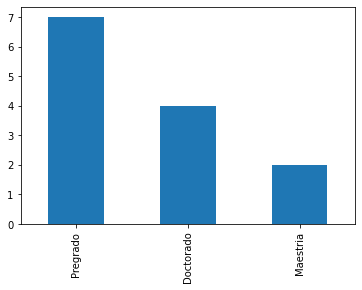

In [49]:
degree_counts.plot(kind='bar')

## Ejercicio

1. Extraer las filas 5 a 10 de nuestro DataFrame, conservando solo las columnas "No. empleos anteriores" y "Contratado?". 
2. Asigne eso a un nuevo DataFrame
3. cree un histograma que represente la distribución de columna "No. empleos anteriores" en este subconjunto de datos.